# Evolutionary Computation: Exericse 4 & 8

## Exercise 4: Role of selection in GA’ s

4a)

In [20]:
from numpy import copy
import matplotlib.pyplot as plt
from random import randint, random

First, we define a few helper functions for step (a), (b) and (c) of the algorithm. We also make a helper function to make a plot.

In [21]:
# Randomly generate a bit sequence x
def generate_bits(bit_length):
    final_array = []
    for i in range(0, bit_length):
        final_array.append(randint(0, 1))
    return final_array


# Create a copy of x and invert each of its bits with probability invert_prob. Let xnew be the result.
def invert_bits(invert_prob, x):
    xnew = x.copy()
    for i in range(0, len(x)):
        if random() < invert_prob:
            if x[i] == 0:
                xnew[i] = 1
            else:
                xnew[i] = 0
    return xnew


# If xnew is closer to the goal sequence than x then replace x with xnew.
def determine_new_x(fitness_function, x, xnew):
    if fitness_function(xnew) > fitness_function(x):
        return xnew
    else:
        return x
    

# Makes a plot of one run
def make_plot_1_run(x_list, iterations):
    plt.plot(list(range(iterations+1)), x_list)
    plt.title("The best fitness for a (1+1)-GA against the 1500 iterations")
    plt.ylabel("fitness as sum of the bits")
    plt.xlabel("iteration")
    plt.show()

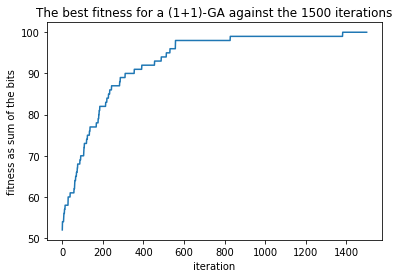

In [22]:
# With bit strings of length 100 and a mutation rate p = 1/100. For a run of 1500
# iterations, we plot the best fitness against the elapsed number of iterations.
def exercise_a(bit_length, iterations):
    invert_prob = 1/bit_length
    x = generate_bits(bit_length)
    f = lambda y: sum(y)
    x_list = [f(x)]
    for i in range(0, iterations):
        xnew = invert_bits(invert_prob, x)
        x = determine_new_x(f, x, xnew)
        x_list.append(f(x))
    make_plot_1_run(x_list, iterations)
    
exercise_a(100, 1500)

4b)

The number of runs that found the optimum for exercise b: 8


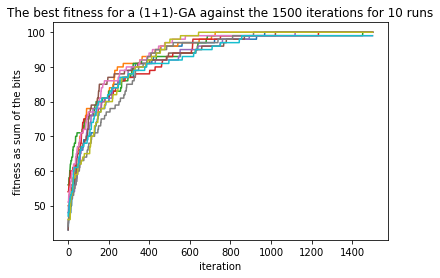

In [23]:
# Makes a plot of ten runs
def make_plot_10_runs(runs_list, iterations, exercise_string):
    for j in runs_list:
        plt.plot(list(range(iterations+1)), j)
    plt.title("The best fitness for a (1+1)-GA against the 1500 iterations for 10 runs")
    plt.ylabel("fitness as sum of the bits")
    plt.xlabel("iteration")
    plt.show()
    

# Performs 10 runs and plots best fitness against elapsed number of iterations of each run in a single figure.
# In the console, we print how many times the algorithm finds the optimum
def exercise_b(bit_length, iterations):
    invert_prob = 1 / bit_length
    runs_list = []
    finds_optimum = 0
    for j in range(0, 10):
        x = generate_bits(bit_length)
        f = lambda y: sum(y)
        x_list = [f(x)]
        for i in range(0, iterations):
            xnew = invert_bits(invert_prob, x)
            x = determine_new_x(f, x, xnew)
            x_list.append(f(x))
        if x_list[-1] == 100:
            finds_optimum += 1
        runs_list.append(x_list)
    print("The number of runs that found the optimum for exercise b: " + str(finds_optimum))
    make_plot_10_runs(runs_list, iterations, 'exercise4b')
    

exercise_b(100, 1500)

4c)

The number of runs that found the optimum for exercise c: 0


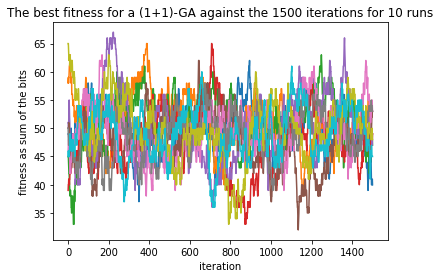

In [24]:
# Performs 10 runs and plots best fitness against elapsed number of iterations of each run in a single figure.
# Using an adapted version of step c (determine new x)
# In the console, we print how many times the algorithm finds the optimum
def exercise_c(bit_length, iterations):
    invert_prob = 1 / bit_length
    runs_list = []
    finds_optimum = 0
    for j in range(0, 10):
        x = generate_bits(bit_length)
        f = lambda y: sum(y)
        x_list = [f(x)]
        for i in range(0, iterations):
            xnew = invert_bits(invert_prob, x)
            x = xnew #NOTE: we do not use determine new x here but immediately return the new x
            x_list.append(f(x))
        if x_list[-1] == 100:
            finds_optimum += 1
        runs_list.append(x_list)
    print("The number of runs that found the optimum for exercise c: " + str(finds_optimum))
    make_plot_10_runs(runs_list, iterations, 'exercise4c')
    
exercise_c(100, 1500)

## Exercise 8: Genetic Programming behaviour

We will use the framework DEAP for this exercise (https://deap.readthedocs.io/en/master/). First, we will need some imports. For any package that is not installed yet, you can use the first two lines.

In [43]:
#run these first two lines for any package that is not yet installed
# import sys
# !{sys.executable} -m pip install deap
import operator
import math
import random
import string  

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

import matplotlib.pyplot as plt

Next, we will followed the example code for symbolic regression explained in the docs (https://deap.readthedocs.io/en/master/examples/gp_symbreg.html).

In [104]:
#define a protected division operator
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

# define the function set using primitives    
pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
# pset.addPrimitive(math.log, 1)
# pset.addPrimitive(math.exp, 1)

# define the terminal set, which is only the variable x
pset.renameArguments(ARG0='x')

# we want to maximize the fitness, the exact fitness function will be defined later on
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# the individual is a tree with nodes from the primitive set and leafs from the terminal set
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

# registering parameters specific to the evolution process using the toolbox
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
# create the population by repeating the individual initialization
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# compile will be used to transform the tree expression in a callable function
toolbox.register("compile", gp.compile, pset=pset)

# the actual fitness function, which should be: - sum of absolute errors.
def evalSymbReg(individual, points):
    func = toolbox.compile(expr=individual)
    sum_abs_err = 0
    # points[0] is the input and points[1] is the output
    for i in range(0, len(points[0])):
        sum_abs_err += abs(func(points[0][i]) - points[1][i])
    return -sum_abs_err,

# define the data as stated in the exercise
inp = np.arange(-1, 1.1, 0.1).tolist()
outp = [0.0000, -0.1629, -0.2624, -0.3129, -0.3264, -0.3125, -0.2784, -0.2289, -0.1664, -0.0909, 0.0, 0.1111, 0.2496, 0.4251, 0.6496, 0.9375, 1.3056, 1.7731, 2.3616, 3.0951, 4.000]

# adding the defined fitness function to the toolbox
toolbox.register("evaluate", evalSymbReg, points=[inp,outp])
# use tournament selection as suggested in the slides
toolbox.register("select", tools.selTournament, tournsize=3)
# one point crossover with uniform probability over all the nodes
toolbox.register("mate", gp.cxOnePoint)
# a uniform probability mutation which may append a new full sub-tree to a node
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# decorate mate and mutate method to limit the height of generated individuals, to avoid bloating
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

Now, we can write the main part of the GA. Note that usually you would run `pop, log = algorithms.eaSimple(pop, toolbox, 0.7, 0, 1, stats=mstats, halloffame=hof, verbose=True)` for the number of generations. However, we need to store the best individual per generation because we need to plot the size of the best individual for exercise 8b. This also means we cannot easily use the logbook. We chose to store the information that we need in the lists instead of trying to extend the logbook after every generation.

In [105]:
random.seed(318)
ngen = 50
pop = toolbox.population(n=1000)
# hall of fame is specific structure which contains the n best individuals
# we only need 1 because we want to make plots using the best individual
hof = tools.HallOfFame(1)

# statistics to compute the mean, standard deviation, minimum, and maximum of both the individuals fitness and size
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

# the actual algorithm
best_ind = []
fit_max = []
size_avgs = []
size_max = []
size_min = []
for i in range(ngen):
    # runs the algorithm for 1 generation and updates the population
    pop, log = algorithms.eaSimple(pop, toolbox, 0.7, 0, 1, stats=mstats, halloffame=hof, verbose=True)
    best_ind.append(len(tools.selBest(pop, k=1)[0]))
    fit_max.append(log.chapters["fitness"].select("max")[1])
    size_avgs.append(log.chapters["size"].select("avg")[1])
    size_max.append(log.chapters["size"].select("max")[1])
    size_min.append(log.chapters["size"].select("min")[1])

   	      	                              fitness                              	                      size                     
   	      	-------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg         	gen	max  	min         	nevals	std        	avg  	gen	max	min	nevals	std    
0  	1000  	-1.21694e+29	0  	-6.05	-2.02824e+31	1000  	1.56635e+30	3.949	0  	7  	2  	1000  	1.66024
1  	728   	-4.5036e+12 	1  	-6.05	-4.5036e+15 	728   	1.42345e+14	3.68 	1  	9  	2  	728   	1.59047
   	      	                              fitness                              	                      size                     
   	      	-------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg        	gen	max  	min        	nevals	std        	avg 	gen	max	min	nevals	std    
0  	0     	-4.5036e+12	0  	-6.05	-4.5036e+15	0     	1.42345e+14	3.68	0  	9  	2  	0     	1.59047
1  

0  	0     	-4.5036e+12	0  	-1.79717e-14	-4.5036e+15	0     	1.42345e+14	15.621	0  	39 	3  	0     	6.13216
1  	672   	-3.9499    	1  	-1.79717e-14	-27.7086   	672   	3.85742    	15.864	1  	47 	3  	672   	5.71695
   	      	                            fitness                            	                      size                     
   	      	---------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max         	min     	nevals	std    	avg   	gen	max	min	nevals	std    
0  	0     	-3.9499	0  	-1.79717e-14	-27.7086	0     	3.85742	15.864	0  	47 	3  	0     	5.71695
1  	760   	-4.5036e+12	1  	-1.79717e-14	-4.5036e+15	760   	1.42345e+14	15.791	1  	41 	3  	760   	5.876  
   	      	                                  fitness                                  	                     size                    
   	      	---------------------------------------------------------------------------	-------------------------------

   	      	                            fitness                            	                     size                     
   	      	---------------------------------------------------------------	----------------------------------------------
gen	nevals	avg    	gen	max        	min     	nevals	std    	avg  	gen	max	min	nevals	std   
0  	0     	-2.9625	0  	-1.7944e-14	-26.6468	0     	4.10724	22.35	0  	53 	7  	0     	5.7839
1  	728   	-2.88198	1  	-1.7944e-14	-21.1977	728   	3.7548 	22.736	1  	47 	7  	728   	6.39455
   	      	                               fitness                                	                      size                     
   	      	----------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max        	min     	nevals	std   	avg   	gen	max	min	nevals	std    
0  	0     	-2.88198	0  	-1.7944e-14	-21.1977	0     	3.7548	22.736	0  	47 	7  	0     	6.39455
1  	700   	-2.85951	1  	-1.7944e-1

1  	680   	-9.0072e+12	1  	-1.77219e-14	-4.5036e+15	680   	2.01206e+14	26.298	1  	65 	5  	680   	8.34405
   	      	                                  fitness                                  	                      size                     
   	      	---------------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg        	gen	max         	min        	nevals	std        	avg   	gen	max	min	nevals	std    
0  	0     	-9.0072e+12	0  	-1.77219e-14	-4.5036e+15	0     	2.01206e+14	26.298	0  	65 	5  	0     	8.34405
1  	676   	-4.64434e+12	1  	-1.77219e-14	-4.5036e+15	676   	1.4241e+14 	27.366	1  	71 	9  	676   	8.90831
   	      	                                 fitness                                  	                      size                     
   	      	--------------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg         	gen	max         	

In [106]:
# check that the found function fits nicely
bests = tools.selBest(pop, k=1)
func = toolbox.compile(expr=bests[0])
print("Best fitting function: " + str(bests[0]) + "\n")

print("Output found function" + "\t\t" + "Actual output")
for x in range(0,len(inp)):
    print("{:.4f}".format(func(inp[x])) + "\t\t\t\t" + str(outp[x]))

Best fitting function: add(mul(x, mul(protectedDiv(add(mul(x, x), protectedDiv(mul(x, x), x)), protectedDiv(mul(x, add(mul(x, x), x)), x)), mul(protectedDiv(add(mul(x, x), protectedDiv(mul(x, x), x)), protectedDiv(mul(x, x), x)), mul(x, x)))), add(mul(x, x), x))

Output found function		Actual output
0.0000				0.0
-0.1629				-0.1629
-0.2624				-0.2624
-0.3129				-0.3129
-0.3264				-0.3264
-0.3125				-0.3125
-0.2784				-0.2784
-0.2289				-0.2289
-0.1664				-0.1664
-0.0909				-0.0909
-0.0000				0.0
0.1111				0.1111
0.2496				0.2496
0.4251				0.4251
0.6496				0.6496
0.9375				0.9375
1.3056				1.3056
1.7731				1.7731
2.3616				2.3616
3.0951				3.0951
4.0000				4.0


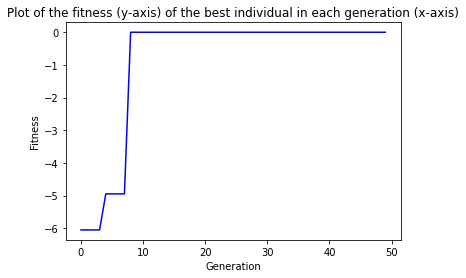

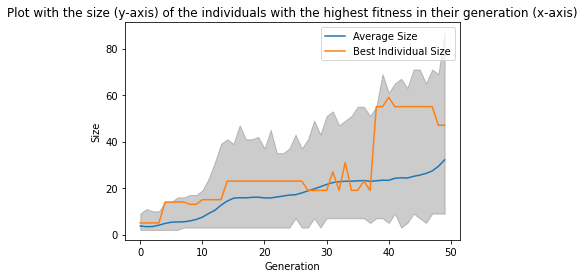

In [107]:
gen = np.arange(0, 50).tolist()

#plot for exercise 8a
plt.plot(gen, fit_max, "b-", label="Minimum Fitness")
plt.title("Plot of the fitness (y-axis) of the best individual in each generation (x-axis)")
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.show()

#plot for exercise 8b
plt.plot(gen, size_avgs, label="Average Size")
plt.plot(gen, best_ind, label="Best Individual Size")
plt.fill_between(gen, size_min, size_max,
                 facecolor="orange", # The fill color
                 color='black',       # The outline color
                 alpha=0.2)          # Transparency of the fill
plt.title("Plot with the size (y-axis) of the individuals with the highest fitness in their generation (x-axis)")
plt.ylabel("Size")
plt.xlabel("Generation")
plt.legend()
plt.show()

Note that we commented out the exp and log functions. If we add them to the function set, we get different (worse) results. We thought this was interesting and although the exercise only wants the exercise below, we wanted to include the better fitting function without exp and log.

In [108]:
#define a protected division operator
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1
    
#define a protected log operator
def protectedLog(x):
    try:
        return math.log(x)
    except ValueError:
        return 1
    
#define a protected log operator
def protectedExp(x):
    try:
        return math.exp(x)
    except (ValueError, OverflowError):
        return 1

# define the function set using primitives    
pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addPrimitive(protectedLog, 1)
pset.addPrimitive(protectedExp, 1)

# define the terminal set, which is only the variable x
pset.renameArguments(ARG0='x')

# we want to maximize the fitness, the exact fitness function will be defined later on
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# the individual is a tree with nodes from the primitive set and leafs from the terminal set
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

# registering parameters specific to the evolution process using the toolbox
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
# create the population by repeating the individual initialization
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# compile will be used to transform the tree expression in a callable function
toolbox.register("compile", gp.compile, pset=pset)

# the actual fitness function, which should be: - sum of absolute errors.
def evalSymbReg(individual, points):
    func = toolbox.compile(expr=individual)
    sum_abs_err = 0
    # points[0] is the input and points[1] is the output
    for i in range(0, len(points[0])):
        sum_abs_err += abs(func(points[0][i]) - points[1][i])
    return -sum_abs_err,

# define the data as stated in the exercise
inp = np.arange(-1, 1.1, 0.1).tolist()
outp = [0.0000, -0.1629, -0.2624, -0.3129, -0.3264, -0.3125, -0.2784, -0.2289, -0.1664, -0.0909, 0.0, 0.1111, 0.2496, 0.4251, 0.6496, 0.9375, 1.3056, 1.7731, 2.3616, 3.0951, 4.000]

# adding the defined fitness function to the toolbox
toolbox.register("evaluate", evalSymbReg, points=[inp,outp])
# use tournament selection as suggested in the slides
toolbox.register("select", tools.selTournament, tournsize=3)
# one point crossover with uniform probability over all the nodes
toolbox.register("mate", gp.cxOnePoint)
# a uniform probability mutation which may append a new full sub-tree to a node
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# decorate mate and mutate method to limit the height of generated individuals, to avoid bloating
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

In [109]:
random.seed(318)
ngen = 50
pop = toolbox.population(n=1000)
# hall of fame is specific structure which contains the n best individuals
# we only need 1 because we want to make plots using the best individual
hof = tools.HallOfFame(1)

# statistics to compute the mean, standard deviation, minimum, and maximum of both the individuals fitness and size
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)

# the actual algorithm
best_ind = []
fit_max = []
size_avgs = []
size_max = []
size_min = []
for i in range(ngen):
    # runs the algorithm for 1 generation and updates the population
    pop, log = algorithms.eaSimple(pop, toolbox, 0.7, 0, 1, stats=mstats, halloffame=hof, verbose=True)
    best_ind.append(len(tools.selBest(pop, k=1)[0]))
    fit_max.append(log.chapters["fitness"].select("max")[1])
    size_avgs.append(log.chapters["size"].select("avg")[1])
    size_max.append(log.chapters["size"].select("max")[1])
    size_min.append(log.chapters["size"].select("min")[1])

   	      	                                 fitness                                 	                      size                     
   	      	-------------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg         	gen	max     	min         	nevals	std      	avg  	gen	max	min	nevals	std    
0  	1000  	-1.41977e+29	0  	-4.24698	-2.02824e+31	1000  	1.691e+30	3.578	0  	7  	2  	1000  	1.52772
1  	696   	-6.7554e+12 	1  	-4.24698	-4.5036e+15 	696   	1.59083e+14	3.436	1  	8  	2  	696   	1.56649
   	      	                                  fitness                                  	                      size                     
   	      	---------------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg        	gen	max     	min        	nevals	std        	avg  	gen	max	min	nevals	std    
0  	0     	-6.7554e+12	0  	-4.24698	-4.5036e+15	0     	1.59083

1  	696   	-7.53259	1  	-1.60672	-59.7315	696   	7.05506	8.724	1  	23 	3  	696   	3.35109
   	      	                                fitness                                	                      size                     
   	      	-----------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max     	min     	nevals	std    	avg  	gen	max	min	nevals	std    
0  	0     	-7.53259	0  	-1.60672	-59.7315	0     	7.05506	8.724	0  	23 	3  	0     	3.35109
1  	660   	-6.81373	1  	-0.880766	-63.0797	660   	6.94808	8.944	1  	22 	3  	660   	3.34767
   	      	                                fitness                                	                      size                     
   	      	-----------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max      	min     	nevals	std    	avg  	gen	max	min	nevals	std    
0  	0     	-6.81373	0  	

1  	684   	-3.52048	1  	-0.341237	-69.4667	684   	4.96537	15.847	1  	38 	4  	684   	4.88504
   	      	                                fitness                                	                      size                     
   	      	-----------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max      	min     	nevals	std    	avg   	gen	max	min	nevals	std    
0  	0     	-3.52048	0  	-0.341237	-69.4667	0     	4.96537	15.847	0  	38 	4  	0     	4.88504
1  	686   	-3.53763	1  	-0.341237	-47.0774	686   	4.78111	15.963	1  	39 	4  	686   	5.21379
   	      	                                fitness                                	                      size                     
   	      	-----------------------------------------------------------------------	-----------------------------------------------
gen	nevals	avg     	gen	max      	min     	nevals	std    	avg   	gen	max	min	nevals	std    
0  	0     	-3.53

In [110]:
# check that the found function fits nicely
bests = tools.selBest(pop, k=1)
func = toolbox.compile(expr=bests[0])
print("Best fitting function: " + str(bests[0]) + "\n")

print("Output found function" + "\t\t" + "Actual output")
for x in range(0,len(inp)):
    print("{:.4f}".format(func(inp[x])) + "\t\t\t\t" + str(outp[x]))

Best fitting function: add(add(mul(mul(x, sin(sin(sin(x)))), mul(x, x)), x), mul(protectedExp(x), mul(sin(x), x)))

Output found function		Actual output
-0.0120				0.0
-0.1406				-0.1629
-0.2293				-0.2624
-0.2822				-0.3129
-0.3039				-0.3264
-0.2990				-0.3125
-0.2719				-0.2784
-0.2266				-0.2289
-0.1659				-0.1664
-0.0909				-0.0909
-0.0000				0.0
0.1111				0.1111
0.2501				0.2496
0.4274				0.4251
0.6561				0.6496
0.9509				0.9375
1.3275				1.3056
1.8019				1.7731
2.3901				2.3616
3.1068				3.0951
3.9658				4.0


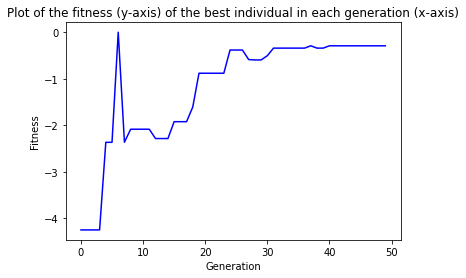

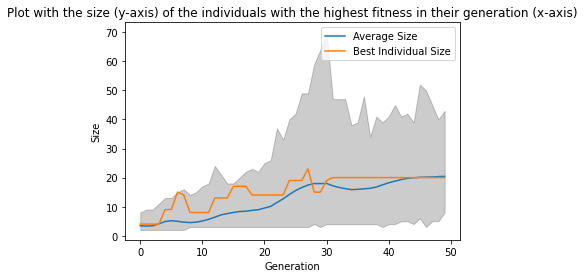

In [111]:
gen = np.arange(0, 50).tolist()

#plot for exercise 8a
plt.plot(gen, fit_max, "b-", label="Minimum Fitness")
plt.title("Plot of the fitness (y-axis) of the best individual in each generation (x-axis)")
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.show()

#plot for exercise 8b
plt.plot(gen, size_avgs, label="Average Size")
plt.plot(gen, best_ind, label="Best Individual Size")
plt.fill_between(gen, size_min, size_max,
                 facecolor="orange", # The fill color
                 color='black',       # The outline color
                 alpha=0.2)          # Transparency of the fill
plt.title("Plot with the size (y-axis) of the individuals with the highest fitness in their generation (x-axis)")
plt.ylabel("Size")
plt.xlabel("Generation")
plt.legend()
plt.show()